In [10]:
import glob
from obspy.core.stream import Stream
import numpy as np
from obspy import read
from amptools.io.read import read_data
from obspy.geodetics import gps2dist_azimuth
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
import warnings
from scipy import ndimage

import matplotlib.dates as mdates
import datetime

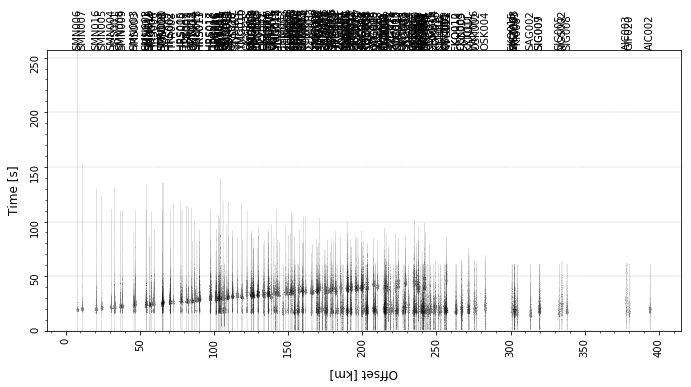

In [11]:
stream = Stream()
warnings.filterwarnings("ignore")
for file in glob.glob('/Users/hschovanec/Repositories/strongmotion-database/tests/JAPAN2018_04_09/*.EW'):
    stream += read_data(file)
for trace in stream:
    trace.stats.distance = gps2dist_azimuth(trace.stats.coordinates.latitude, trace.stats.coordinates.longitude,
                                         35.183, 132.587)[0]
    if trace.stats['station'] == 'SMN018':
        sttime = trace.stats['starttime']
stream.filter('bandpass', freqmin=0.1, freqmax=10)

# Do the section plot..
# If no customization is done after the section plot command, figure
# initialization can be left out and also option ".., show=False, fig=fig)" can
# be omitted, and figure is shown automatically
fig = plt.figure(figsize=(10, 5))
stream.plot(type='section', linewidth=.25, grid_linewidth=.25, show=False,
            tick_rotation=90, fig=fig)

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in stream:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=90,
            va="bottom", ha="center", transform=transform, zorder=10)
ax.set_ylabel('Time [s]', rotation=90, fontsize=12, labelpad=10)
ax.set_xlabel('Offset [km]', rotation=180, fontsize=12, labelpad=10)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.savefig('amptools.png',pad_inches=0.3, dpi=100,bbox_inches="tight")
plt.show()

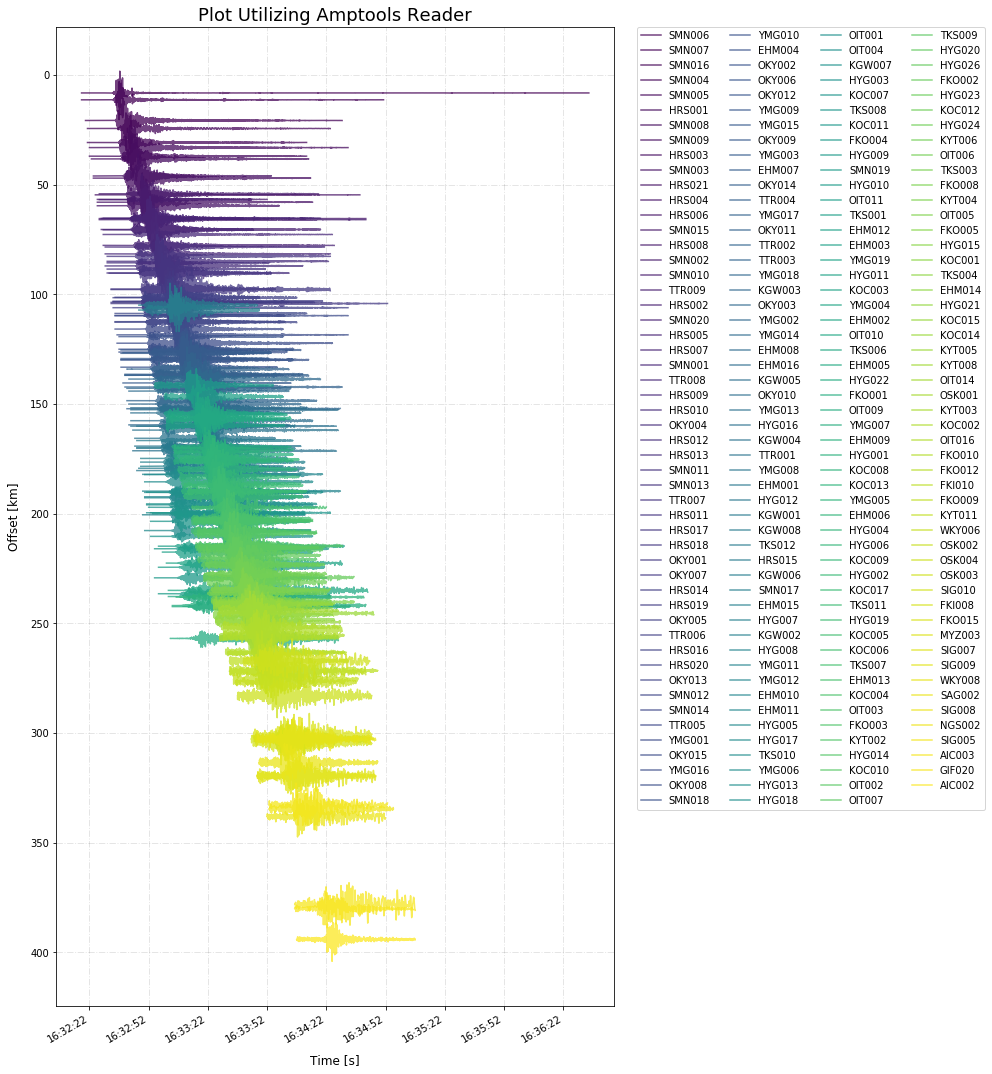

In [18]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
NUM_COLORS = len(stream)
ax = fig.axes[0]
cm = plt.get_cmap('viridis')
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for idx in range(len(stream)):
    stream[idx].data =  stream[idx].data / trace.stats.calib
for trace in stream.sort(['starttime']).normalize():
    dates = []
    for date in trace.times("utcdatetime"):
        dates += [date.datetime]
    distance = gps2dist_azimuth(trace.stats.coordinates.latitude, trace.stats.coordinates.longitude,
                                         35.183, 132.587)[0]/1000
    plt.plot(dates, 10 * trace.data + distance, alpha=.75, label=trace.stats.station)
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.gca().invert_yaxis()

ax.grid(color='k', linestyle='-.', linewidth=1, alpha=.1)
ax.set_ylabel('Offset [km]', rotation=90, fontsize=12, labelpad=10)
ax.set_xlabel('Time [s]', rotation=0, fontsize=12, labelpad=10)
ax.set_title('Plot Utilizing Amptools Reader', fontsize=18)
plt.legend(ncol=4, bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.savefig('amptools_relative.png',pad_inches=0.3, dpi=100,bbox_inches="tight")
plt.show()

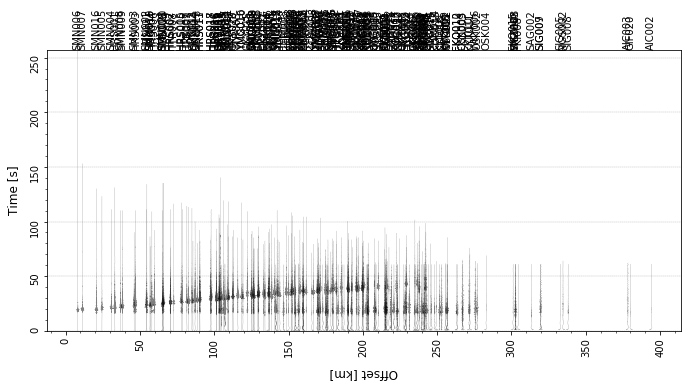

In [19]:
stream = Stream()
warnings.filterwarnings("ignore")
for file in glob.glob('/Users/hschovanec/Repositories/strongmotion-database/tests/JAPAN2018_04_09/*.EW'):
    stream += read(file)
for trace in stream:
    trace.stats.distance = gps2dist_azimuth(trace.stats.knet.stla, trace.stats.knet.stlo,
                                         35.183, 132.587)[0]
    trace.stats['ev_coord'] = (35.183, 132.587)
    if trace.stats['station'] == 'FKI008':
        sttime = trace.stats['starttime']
stream.filter('bandpass', freqmin=0.1, freqmax=10)

# Do the section plot..
# If no customization is done after the section plot command, figure
# initialization can be left out and also option ".., show=False, fig=fig)" can
# be omitted, and figure is shown automatically
fig = plt.figure(figsize=(10, 5))
stream.plot(type='section', starttime=sttime-100, linewidth=.25, grid_linewidth=.25, show=False,
        tick_rotation=180, fig=fig)
# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in stream:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=90,
            va="bottom", ha="center", transform=transform, zorder=10)
ax.set_ylabel('Time [s]', rotation=90, fontsize=12, labelpad=10)
ax.set_xlabel('Offset [km]', rotation=180, fontsize=12, labelpad=10)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.savefig('obspy.png',pad_inches=.3, dpi=100,bbox_inches="tight")
plt.show()

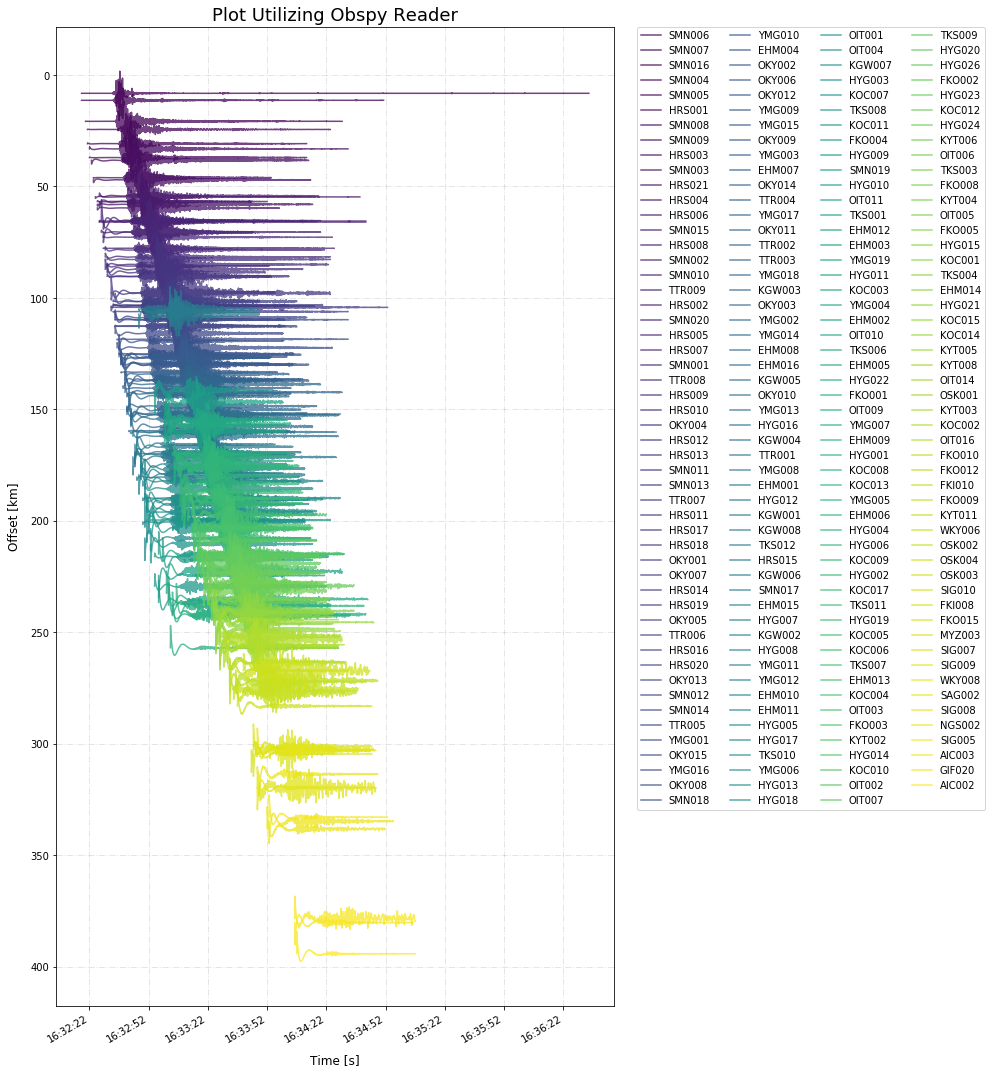

In [20]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
NUM_COLORS = len(stream)
ax = fig.axes[0]
cm = plt.get_cmap('viridis')
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for trace in stream.sort(['starttime']).normalize():
    dates = []
    for date in trace.times("utcdatetime"):
        dates += [date.datetime]
    distance = gps2dist_azimuth(trace.stats.knet.stla, trace.stats.knet.stlo,
                                         35.183, 132.587)[0]/1000
    plt.plot(dates, 10*trace.data + distance, alpha=.75, label=trace.stats.station)
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.gca().invert_yaxis()

ax.grid(color='k', linestyle='-.', linewidth=1, alpha=.1)
ax.set_ylabel('Offset [km]', rotation=90, fontsize=12, labelpad=10)
ax.set_title('Plot Utilizing Obspy Reader', fontsize=18)
ax.set_xlabel('Time [s]', rotation=0, fontsize=12, labelpad=10)
plt.legend(ncol=4, bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.savefig('obspy_relative.png',pad_inches=0.3, dpi=100,bbox_inches="tight")
plt.show()